<h1 style="text-align: center; color: navy; font-family: 'Arial Black', Gadget, sans-serif;">
    Análisis de patrones de viaje y el impacto del clima en la frecuencia de viajes compartidos: El caso de Zuber en Chicago
</h1>

# Contenido <a id='back'></a>

* [Introducción](#intro)
* [Etapa 1. Descripción de los datos](#data_review)
    * [Conclusiones](#data_review_conclusions)
* [Etapa 2. Análisis de los datos](#data_analyst)
    * [2.1 Gráfico de las 10 empresas mas populares en sus números de viajes](#top_10_companies)
    * [2.2 Gráfico de los 10 barrios mas populares en sus números de finalizaciones](#top_10_dropoff)
    * [2.3 Conclusiones](#data_analyst_conclusions)
* [Etapa 3. Prueba de Hipótesis](#data_hypotesis)  
* [Conclusiones finales del proyecto](#final_conclusions)

## Introducción <a id =intro></a>

En el competitivo mundo de las empresas de viajes compartidos, el análisis de datos es una herramienta fundamental para comprender los comportamientos de los pasajeros y anticipar tendencias clave que pueden impactar el éxito de una compañía. Zuber, una nueva empresa de transporte compartido que ha comenzado operaciones en Chicago, busca aprovechar al máximo la información disponible para tomar decisiones informadas y optimizar su servicio.

Este proyecto tiene como objetivo identificar patrones en los viajes realizados por los pasajeros, examinando sus preferencias y las influencias externas, como el clima, que puedan afectar la frecuencia y naturaleza de los desplazamientos. A través del análisis de una base de datos que incluye información tanto de Zuber como de competidores, se pretende probar la hipótesis de que las condiciones climáticas juegan un papel significativo en la demanda de viajes.

# Etapa 1: Descripción de los Datos<a id=data_review></a>

In [21]:
# Importación de las librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns

In [22]:
# Importación de los DF a utilizar
df_company = pd.read_csv('/home/josue/Recopilación_y_almacenamiento_de_datos/moved_project_sql_result_01.csv')
df_dropoff_location = pd.read_csv('/home/josue/Recopilación_y_almacenamiento_de_datos/moved_project_sql_result_04.csv')
df_weather_conditions = pd.read_csv('/home/josue/Recopilación_y_almacenamiento_de_datos/moved_project_sql_result_07.csv')

In [23]:
# Revisar los Datos
df_company.info(show_counts=True)
print()
df_dropoff_location.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [24]:
df_company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [25]:
print(f'Valores ausentes: ', df_company.isna().sum())

Valores ausentes:  company_name    0
trips_amount    0
dtype: int64


In [26]:
df_dropoff_location['average_trips'] = df_dropoff_location['average_trips'].round(2)
df_dropoff_location.head()

,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90


In [27]:
print(f'Valores ausentes: ', df_dropoff_location.isna().sum())

Valores ausentes:  dropoff_location_name    0
average_trips            0
dtype: int64


In [28]:
df_weather_conditions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [29]:
df_weather_conditions['start_ts'] = pd.to_datetime(df_weather_conditions['start_ts'])

In [30]:
df_weather_conditions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [31]:
print(f'Valores ausentes: ', df_weather_conditions.isna().sum())

Valores ausentes:  start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


### Conclusiones <a id=data_review_conclusions></a>
Después de importar los datos y analizarlos, podemos observar que son datos limpios sin errores, los títulos de las columnas están normalizados, los tipos de datos son correctos, no ha datos nulos ni ausentes, solo en el df `df_weather_conditions` cambiamos la columna `starts_ts` a datetime para su evaluación correcta, así que podemos pasar a la siguiente etapa.

# Etapa 2: Análisis de Datos <a id=data_analyst></a>

A continuación, vamos a realizar dos gráficos para comprender de mejor forma la información.

### Gráfico de las 10 empresas mas populares en sus números de viajes <a id=top_1o_companies></a>


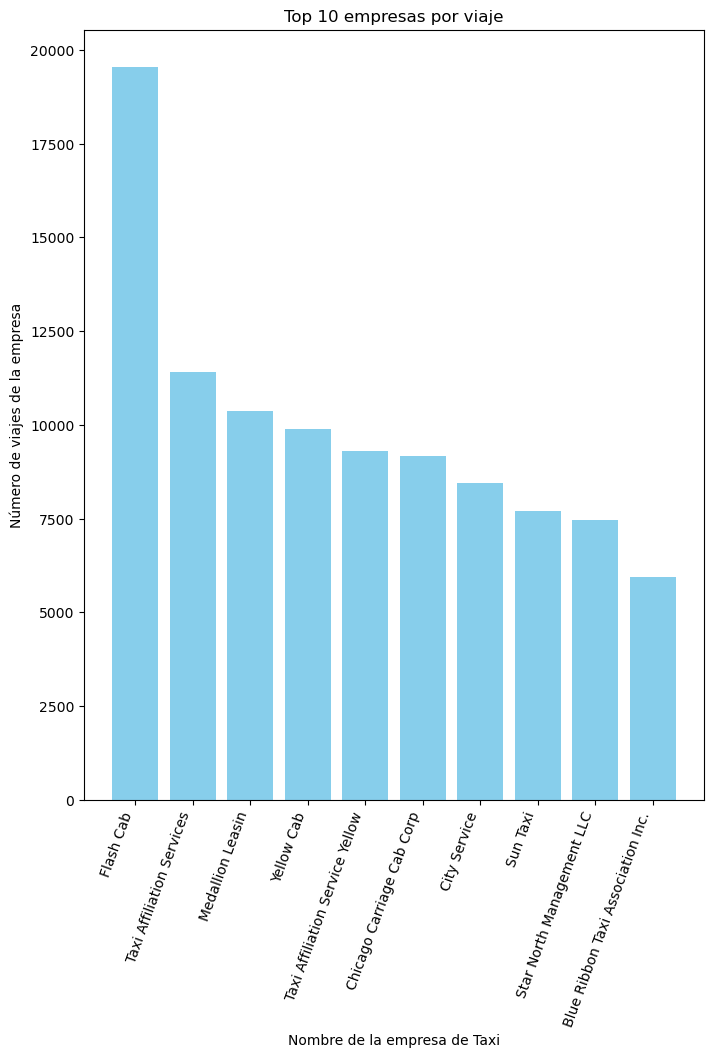

In [35]:
# Gráfico de las 10 empresas mas populares en sus números de viajes

top_10_companies_taxi = df_company.groupby('company_name')['trips_amount'].sum().reset_index().sort_values(by='trips_amount', ascending=False).head(10)

# Creación del gráfico
plt.figure(figsize=(8, 10))
plt.bar(top_10_companies_taxi['company_name'], top_10_companies_taxi['trips_amount'], color='skyblue')
plt.title('Top 10 empresas por viaje')
plt.xlabel('Nombre de la empresa de Taxi')
plt.ylabel('Número de viajes de la empresa')
plt.xticks(rotation=70, ha='right')
plt.show()

### Gráfico de los 10 barrios mas populares en sus números de finalizaciones <a id=top_10_dropoff></a>

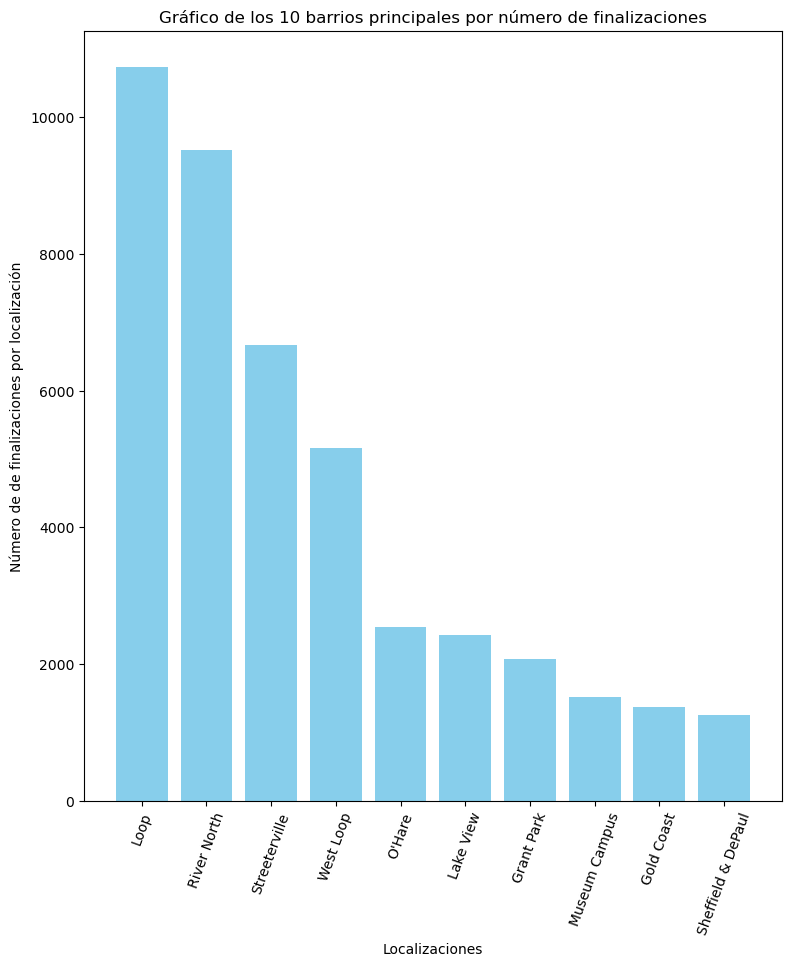

In [36]:
# Gráfico para los 10 barrios principales por números de finalizaciones
top_10_dropoff_location = df_dropoff_location.groupby('dropoff_location_name')['average_trips'].sum().reset_index().sort_values(by='average_trips', ascending=False).head(10)

# Hacer el gráfico
plt.figure(figsize=(9, 10))
plt.bar(top_10_dropoff_location['dropoff_location_name'], top_10_dropoff_location['average_trips'], color='skyblue')
plt.title('Gráfico de los 10 barrios principales por número de finalizaciones')
plt.xlabel('Localizaciones')
plt.ylabel('Número de de finalizaciones por localización')
plt.xticks(rotation=70)
plt.show()

### 2.3 Conclusiones del Análisis de Datos <a id=data_analyst_conclusions></a>

En el primer gráfico vemos las empresas con la mayor cantidad de viajes de taxi, es un conjunto de datos de las 10 empresas con mas números de viajes, es digno de ver que `flash_cab` le saca mucha ventaja a su competencia, con casi 20,000 viajes, seguido de `taxi_affiliation_taxi` con menos de 12,500, a partir del segundo puesto, va disminuyendo de manera gradual, es decir las empresas restantes tienen una competencia por captar mas usuarios, mientras que la primera su tasa de éxito es muy buena.

En el segundo gráfico podemos ver, en donde terminaron los viajes de los usuarios, el primero es `Loop` que es Centro Financiero de Chicago, seguro muchas personas tienen que hacer diferentes operaciones y gran parte de las dejadas es a este lugar, por lo tanto, tener servicio siempre disponible y suficiente para este sector, es de vital importancia.

### Prueba de Hipótesis <a id=data_hypotesis></a>

In [34]:
# Probar la siguiente Hipótesis
# La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.
df_weather_conditions['day_of_week'] = df_weather_conditions['start_ts'].dt.dayofweek
saturday_df = df_weather_conditions[df_weather_conditions['day_of_week'] == 5]

satuarday_rainy = saturday_df[saturday_df['weather_conditions'] == 'Bad']
saturdar_clear = saturday_df[saturday_df['weather_conditions'] == 'Good']

duration_rainy = satuarday_rainy['duration_seconds']
duration_clear = saturdar_clear['duration_seconds']

t_stat, p_value = ttest_ind(duration_clear, duration_rainy, equal_var=True)

# Imprimir el valor de t y el valor p
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Interpretar los resultados
alpha = 0.05

if p_value < alpha:
    print("Rechazamos la Hipótesis Nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos")
else:
    print("No podemos rechazar la Hipótesis Nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos")


t-statistic: -6.946177714041499
p-value: 6.517970327099473e-12
Rechazamos la Hipótesis Nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos


### Conclusiones de la Prueba de Hipótesis
Dado que el valor p es muchísimo menor que α=0.05, rechazamos la hipótesis nula. Esto significa que existe evidencia estadísticamente significativa para afirmar que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos. En otras palabras, el clima lluvioso los sábados sí afecta la duración promedio de los viajes en esta ruta.

# Conclusiones finales del Proyecto <a id=final_conclusions></a>
En este proyecto, se analizaron datos de viajes en taxi de Chicago, explorando patrones clave sobre las preferencias de los pasajeros y el impacto de factores externos, como el clima, en los viajes. Se realizaron las siguientes tareas:

#### Análisis exploratorio de datos:

- Se identificaron las principales empresas de taxis por número de viajes, destacando **Flash Cab** y **Taxi Affiliation Services**.
- Se analizaron los 10 principales barrios de Chicago en términos de finalización de viajes, con **Loop** liderando por un amplio margen.

#### Prueba de hipótesis:

- Se planteó la hipótesis de que la duración promedio de los viajes desde el **Loop** hasta el **Aeropuerto Internacional O'Hare** cambia los sábados lluviosos.
- Se utilizó una prueba t de dos muestras independientes para comparar las duraciones promedio de los viajes en sábados lluviosos y sábados sin lluvia.
- El análisis reveló que la hipótesis nula fue rechazada, indicando que el clima lluvioso los sábados afecta significativamente la duración de los viajes en esa ruta.

### Conclusión general:

El análisis de los datos de viajes en taxi en Chicago muestra patrones claros de comportamiento en las preferencias de los pasajeros. Además, se confirmó que el clima lluvioso tiene un impacto notable en la duración de los viajes desde el **Loop** hasta el **Aeropuerto Internacional O'Hare**, lo que destaca la importancia de considerar factores climáticos al evaluar la eficiencia del transporte en la ciudad.
